# FourPeak analysis


In [203]:
import mlrose
import numpy as np
import pandas as pd
from time import time
import os
from tqdm import tqdm

from itertools import product


In [2]:
def imax(l):
    pos = 0
    max_val = 0
    for i in range(len(l)) :
        if l[i] > max_val :
            pos = i
            max_val = l[i]
    return(max_val, i)

In [51]:
## Saving parameters
dir_="results/plot/"

results_dir='./results'
plot_dir='./data/plot'

if not os.path.exists(dir_):
    os.makedirs(dir_)

    
    
max_iter_list=[10, 20, 50,100,200]
state_size = 50

nb_restarts_list=[5,10,15,20,25,30,35,40,45,50]

In [49]:


## Hill climbing

hill_climb_best_state=[]
hill_climb_best_fit=[]
hill_climb_curve=[]
hill_climb_time=[]
threshold_param_list=range(0,10)
print("Random Hill Climbing")

for threshold, nb_restarts in tqdm(product(threshold_param_list,nb_restarts_list)):
        for iters in max_iter_list:
            fn=mlrose.FourPeaks(t_pct=threshold/10)
            state=np.random.randint(0,2,size=state_size)
            problem_fit=mlrose.DiscreteOpt(state_size, fn)
            start=time()
            best_state, best_fitness, curve = mlrose.random_hill_climb(problem_fit, 
                                                                   restarts=nb_restarts,
                                                                   max_attempts = 500, 
                                                                   max_iters=int(iters), curve=True)
            end=time()
            hill_climb_time.append(end-start)
            hill_climb_best_state.append(best_state)
            hill_climb_best_fit.append(best_fitness)
            hill_climb_curve.append(curve)


4it [00:00, 12.53it/s]

Random Hill Climbing


110it [00:24,  4.50it/s]


In [3]:
from matplotlib import pyplot as plt

In [4]:
plt.plot(hill_climb_best_fit)

NameError: name 'hill_climb_best_fit' is not defined

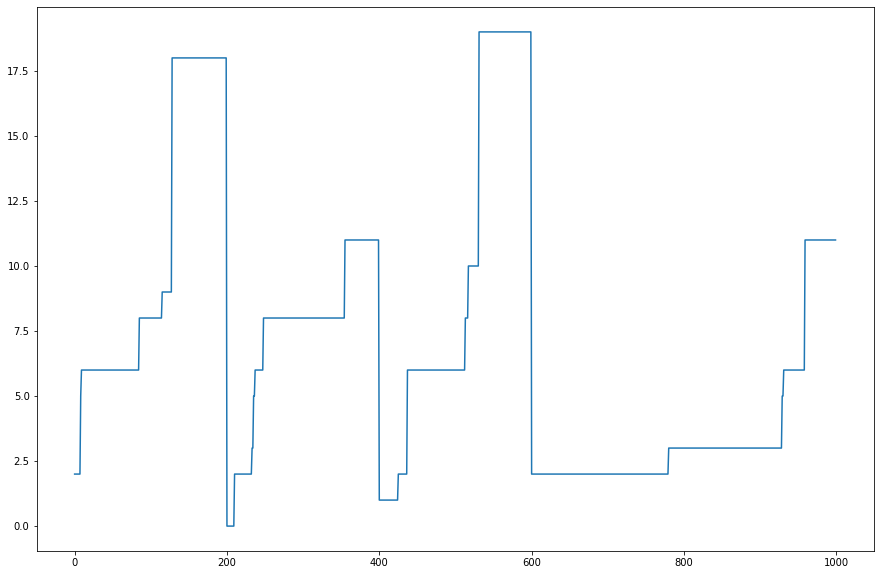

In [353]:
best_state, best_fitness, curve = mlrose.random_hill_climb(problem_fit, 
                                                                   restarts=4,
                                                                   max_attempts = 500, 
                                                                   max_iters=int(iters), curve=True)

plt.plot(curve)

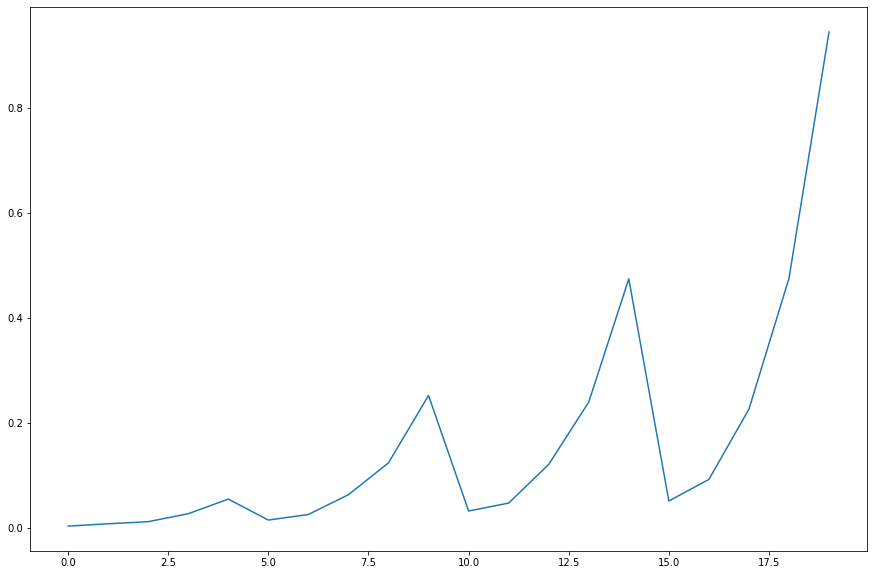

In [145]:
plt.plot(hill_climb_time)

In [54]:
# did not even get to the 500 attempts

In [195]:
## Hill climbing

nb_restarts_list=[10,50,100,200]
hill_climb_best_state=[]
hill_climb_best_fit=[]
hill_climb_curve=[]
hill_climb_time=[]
threshold_param_list=[0.5]
print("Random Hill Climbing")

for threshold, nb_restarts in tqdm(list(
    product(threshold_param_list,nb_restarts_list))):
        for iters in max_iter_list:
            fn=mlrose.FourPeaks(t_pct=threshold/10)
            state=np.random.randint(0,2,size=state_size)
            problem_fit=mlrose.DiscreteOpt(state_size, fn)
            start=time()
            best_state, best_fitness, curve = mlrose.random_hill_climb(problem_fit, 
                                                                   restarts=nb_restarts,
                                                                   max_attempts = 500, 
                                                                   max_iters=int(iters), curve=True)
            end=time()
            hill_climb_time.append(end-start)
            hill_climb_best_state.append(best_state)
            hill_climb_best_fit.append(best_fitness)
            hill_climb_curve.append(curve)







  0%|          | 0/4 [00:00<?, ?it/s]





 25%|██▌       | 1/4 [00:00<00:00,  9.24it/s]

Random Hill Climbing








 50%|█████     | 2/4 [00:00<00:00,  4.68it/s]





 75%|███████▌  | 3/4 [00:01<00:00,  2.40it/s]





100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


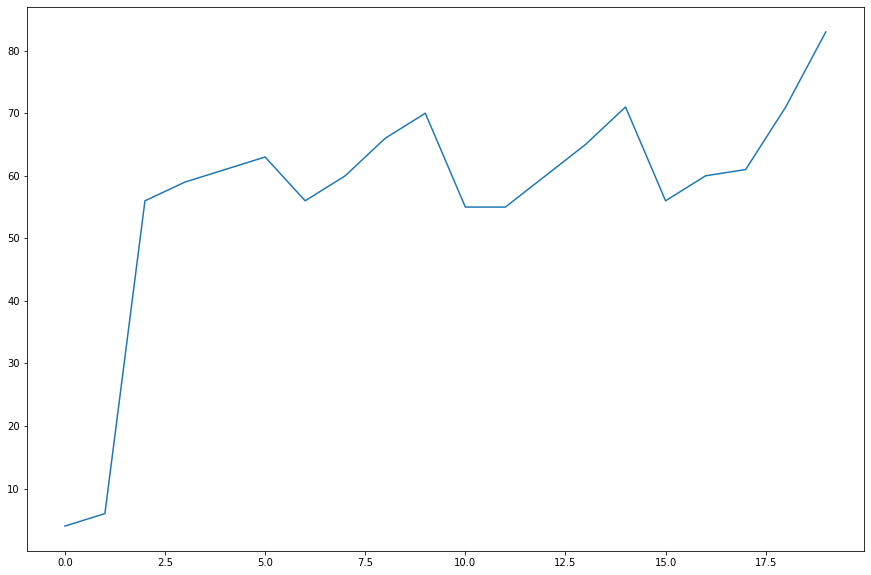

In [196]:
plt.plot(hill_climb_best_fit)
# plot time on the same axis

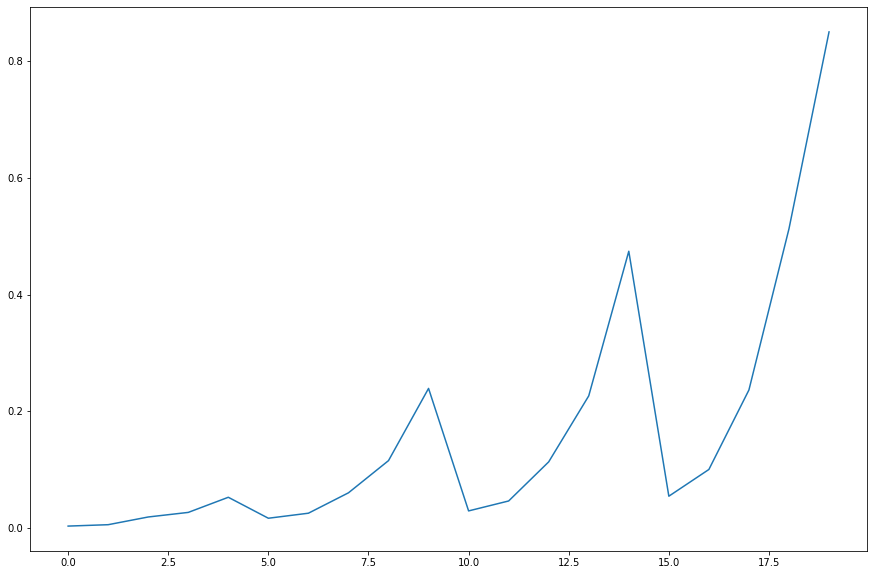

In [380]:
plt.plot(hill_climb_time)

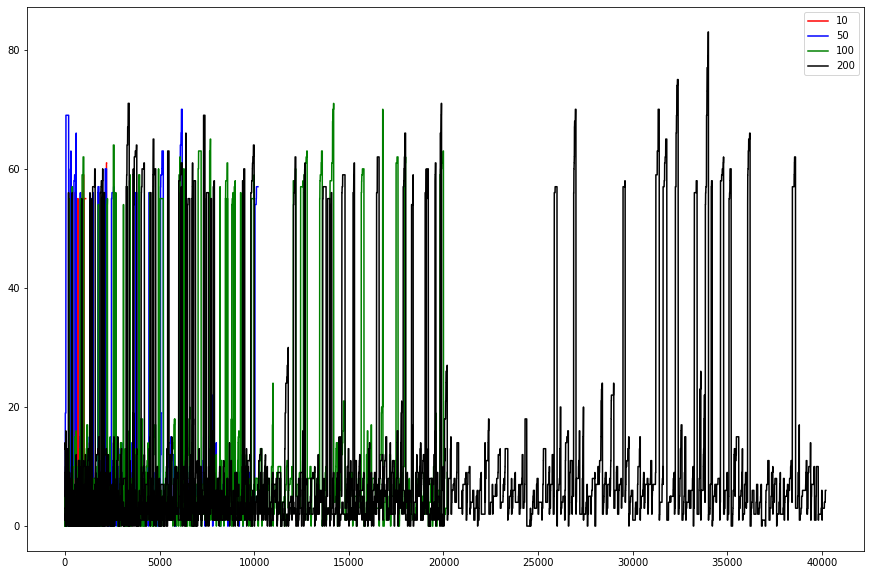

In [198]:
plt.rcParams["figure.figsize"] = (15,10)
color_list = ['red','blue', 'green','black']
no_duplicate = []
l= list(
    product(threshold_param_list,nb_restarts_list))
for i in range(len(hill_climb_curve)) :
    c = 0
    while l[int(i/len(max_iter_list))][1] != nb_restarts_list[c] :
        c+=1
    color = c/len(population_list)
    if c not in no_duplicate :
        plt.plot(hill_climb_curve[i], color = color_list[c], label=str(population_list[c]))
        no_duplicate.append(c)
    else : 
        plt.plot(hill_climb_curve[i], color = color_list[c])        
    
plt.legend()

# Results

In [200]:
result, i = imax(hill_climb_best_fit)

print("The best value found is ", result, " with state ",hill_climb_best_state[i])
print("The time required to find this result was ",hill_climb_time[i], "s")

The best value found is  83.0  with state  [1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
The time required to find this result was  0.849951982498169 s


In [330]:
## Standart testing
n_iteration = 10
durations = []
score = []
for i in (range(n_iteration)) :
            fn=mlrose.FourPeaks(0.1)
            state=np.random.randint(0,2,size=state_size)
            problem_fit=mlrose.DiscreteOpt(state_size, fn)
            start=time()
            best_state, best_fitness = mlrose.random_hill_climb(problem_fit, 
                                                                   restarts=80,
                                                                   max_attempts = 400, 
                                                                   max_iters=550)
            end=time()
            durations.append(end-start)
            score.append(best_fitness)
print("Average score : ", np.mean(score))
print("Average time :  ", np.mean(durations))



Average score :  81.2
Average time :   1.0350637674331664


In [331]:
hil_score = score

## Genetic Algorithm

In [82]:
## Genetic Algorithm
population_list=[10,50, 100, 200]
mutation_probability_list=np.linspace(0.1,0.5,5)
genetic_best_state_list=[]
genetic_best_fit_list=[]
genetic_curve=[]
genetic_time=[]

In [83]:

for threshold, pops, pr in tqdm(list(product(threshold_param_list,population_list,mutation_probability_list))):
    for iters in (max_iter_list):
        fn=mlrose.FourPeaks(t_pct=threshold/10)
        state=np.random.randint(0,2,size=state_size)
        problem_fit=mlrose.DiscreteOpt(state_size, fn)
        
        start=time()
        best_state, best_fitness, curve = mlrose.genetic_alg(problem_fit,
                                                               mutation_prob = pr,
                                                               max_attempts = 500,
                                                               pop_size=pops,
                                                               max_iters=int(iters),
                                                               curve=True)
        end=time()
        genetic_time.append(end-start)
        genetic_best_state_list.append(best_state)
        genetic_best_fit_list.append(best_fitness)
        genetic_curve.append(curve)








  0%|          | 0/20 [00:00<?, ?it/s]





  5%|▌         | 1/20 [00:00<00:06,  2.88it/s]





 10%|█         | 2/20 [00:00<00:06,  2.65it/s]





 15%|█▌        | 3/20 [00:01<00:06,  2.51it/s]





 20%|██        | 4/20 [00:01<00:06,  2.36it/s]





 25%|██▌       | 5/20 [00:02<00:06,  2.26it/s]





 30%|███       | 6/20 [00:03<00:11,  1.23it/s]





 35%|███▌      | 7/20 [00:05<00:14,  1.09s/it]





 40%|████      | 8/20 [00:07<00:16,  1.34s/it]





 45%|████▌     | 9/20 [00:09<00:17,  1.57s/it]





 50%|█████     | 10/20 [00:12<00:18,  1.82s/it]





 55%|█████▌    | 11/20 [00:15<00:20,  2.25s/it]





 60%|██████    | 12/20 [00:18<00:21,  2.64s/it]





 65%|██████▌   | 13/20 [00:22<00:21,  3.02s/it]





 70%|███████   | 14/20 [00:27<00:20,  3.45s/it]





 75%|███████▌  | 15/20 [00:31<00:18,  3.79s/it]





 80%|████████  | 16/20 [00:38<00:18,  4.66s/it]





 85%|████████▌ | 17/20 [00:45<00:15,  5.32s/it]





 90%|█████████ | 18/20 [00:52<00:11,  5.94s/it]





 95%|

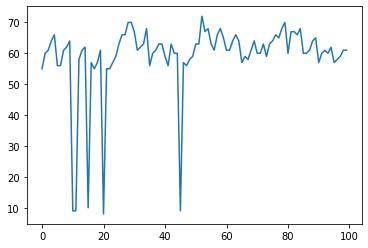

In [84]:
plt.plot(genetic_best_fit_list)

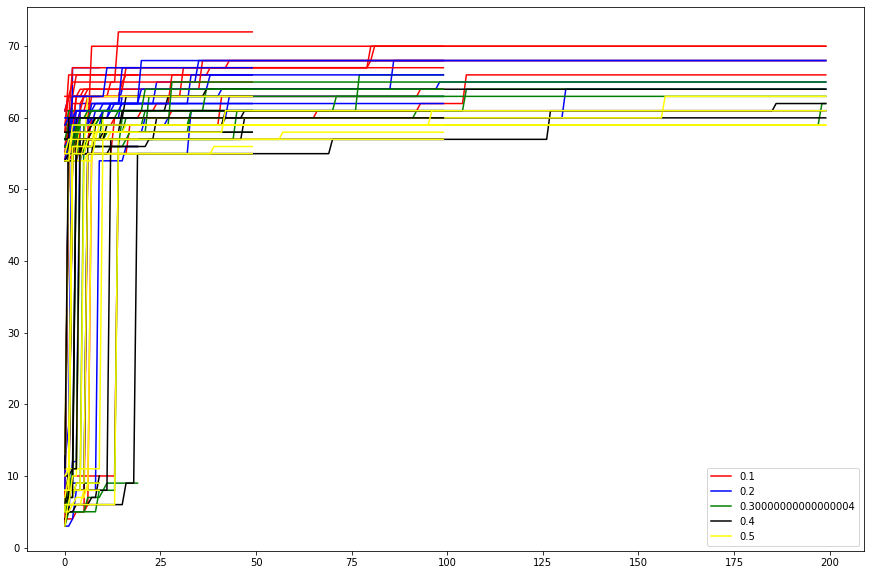

In [234]:
plt.rcParams["figure.figsize"] = (15,10)
color_list = ['red','blue', 'green','black','yellow']
no_duplicate = []
l= list(product(threshold_param_list,population_list,mutation_probability_list))
for i in range(len(genetic_curve)) :
    c = 0
    while l[int(i/len(max_iter_list))][2] != mutation_probability_list[c] :
        c+=1
    color = c/len(mutation_probability_list)
    if c not in no_duplicate :
        plt.plot(genetic_curve[i], color = color_list[c], label=str(mutation_probability_list[c]))
        no_duplicate.append(c)
    else : 
        plt.plot(genetic_curve[i], color = color_list[c])        
    
plt.legend()

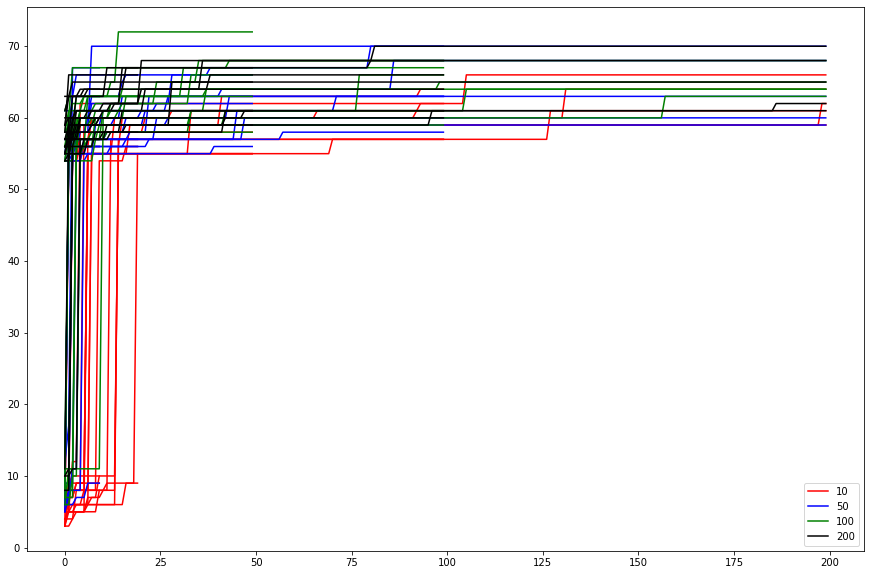

In [135]:
plt.rcParams["figure.figsize"] = (15,10)
color_list = ['red','blue', 'green','black']
no_duplicate = []
l= list(product(threshold_param_list,population_list,mutation_probability_list))
for i in range(len(genetic_curve)) :
    c = 0
    while l[int(i/len(max_iter_list))][1] != population_list[c] :
        c+=1
    color = c/len(population_list)
    if c not in no_duplicate :
        plt.plot(genetic_curve[i], color = color_list[c], label=str(population_list[c]))
        no_duplicate.append(c)
    else : 
        plt.plot(genetic_curve[i], color = color_list[c])        
    
plt.legend()

In [332]:
## Standart testing
n_iteration = 10
durations = []
score = []
for i in (range(n_iteration)) :
            fn=mlrose.FourPeaks(0.1)
            state=np.random.randint(0,2,size=state_size)
            problem_fit=mlrose.DiscreteOpt(state_size, fn)
            start=time()
            best_state, best_fitness = mlrose.genetic_alg(problem_fit,
                                                               mutation_prob = 0.1,
                                                               max_attempts = 100,
                                                               pop_size=100,
                                                               max_iters=150)
            end=time()
            durations.append(end-start)
            score.append(best_fitness)
print("Average score : ", np.mean(score))
print("Average time :  ", np.mean(durations))

Average score :  68.7
Average time :   1.3055298566818236


In [333]:
ga_score = score

In [376]:
print("Simulated Annealing")

annealing_best_state=[]
annealing_best_fit=[]
annealing_curve=[]
annealingtime=[]
decay_list = [0.99, 0.995, 0.998]
max_iter_list=[500,1000,2000]
threshold_param_list = [0.1]


Simulated Annealing


In [377]:
for threshold, iters, decay in tqdm(list(product(threshold_param_list,max_iter_list, decay_list))):
            fn=mlrose.FourPeaks(t_pct=threshold/10)
            state=np.random.randint(0,2,size=state_size)
            problem_fit=mlrose.DiscreteOpt(state_size, fn)
            start=time()
            best_state, best_fitness, curve = mlrose.simulated_annealing(problem_fit,
                                                                           max_attempts = 1000, 
                                                                           max_iters=int(iters),
                                                                           curve=True, 
                                                                           schedule=mlrose.GeomDecay(init_temp=1.0, decay=decay, min_temp=0.001))
           
            end=time()
            annealingtime.append(end-start)
            annealing_best_state.append(best_state)
            annealing_best_fit.append(best_fitness)
            annealing_curve.append(curve)
    










  0%|          | 0/9 [00:00<?, ?it/s]/usr/local/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)









 44%|████▍     | 4/9 [00:00<00:00, 39.74it/s]








 78%|███████▊  | 7/9 [00:00<00:00, 30.44it/s]








100%|██████████| 9/9 [00:00<00:00, 21.72it/s]


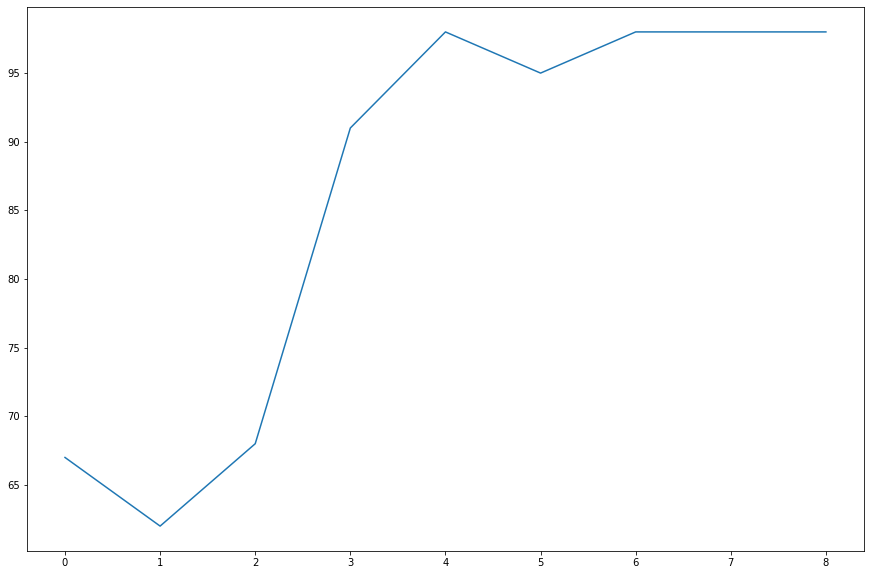

In [378]:
plt.plot(annealing_best_fit)

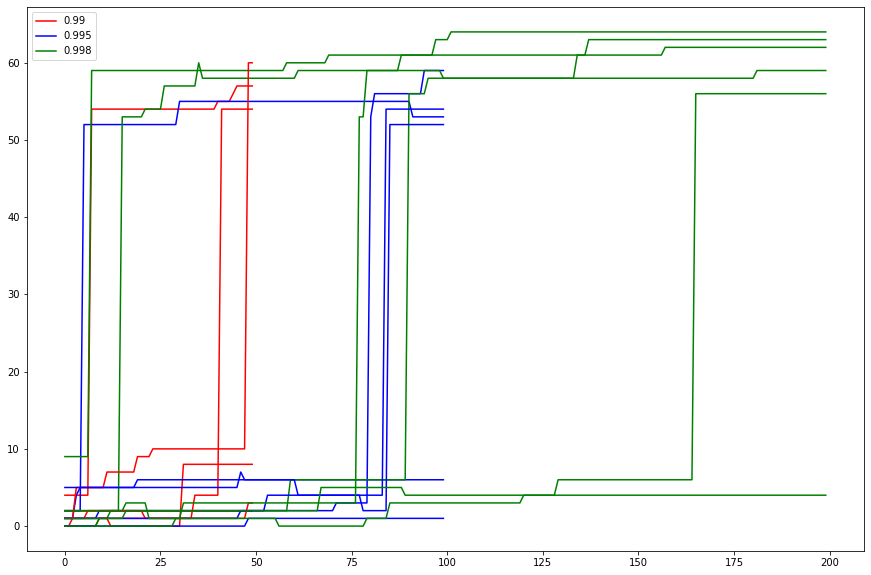

In [375]:
plt.rcParams["figure.figsize"] = (15,10)
color_list = ['red','blue', 'green','black']
no_duplicate = []
l= list(product(threshold_param_list,max_iter_list, decay_list))
for i in range(len(annealing_curve)) :
    c = 0
    while l[int(i/len(max_iter_list))][2] != decay_list[c] :
        c+=1
    color = c/len(population_list)
    if c not in no_duplicate :
        plt.plot(annealing_curve[i], color = color_list[c], label=str(decay_list[c]))
        no_duplicate.append(c)
    else : 
        plt.plot(annealing_curve[i], color = color_list[c])        
    
plt.legend()

In [386]:
## Standart testing
n_iteration = 10
durations = []
score = []
for i in (range(n_iteration)) :
            fn=mlrose.FourPeaks(0.1)
            state=np.random.randint(0,1,size=state_size)
            problem_fit=mlrose.DiscreteOpt(state_size, fn)
            start=time()
            best_state, best_fitness = mlrose.simulated_annealing(problem_fit,
                                                            max_attempts = 50000, 
                                                            max_iters=20000,
                                                            schedule=mlrose.GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))
            end=time()
            durations.append(end-start)
            score.append(best_fitness)
print("Average score : ", np.mean(score))
print("Average time :  ", np.mean(durations))

Average score :  94.0
Average time :   0.7080601930618287


In [390]:
ann_score = score

# MIMIC

In [317]:
keep_list=np.linspace(0.1,0.2,5)
mimic_best_state=[]
mimic_best_fit=[]
mimic_curve=[]
mimic_time=[]
print("Mimic")

Mimic


In [318]:
for threshold, keep_param in tqdm(list(product(threshold_param_list,keep_list))):
            fn=mlrose.FourPeaks(t_pct=threshold/10)
            state=np.random.randint(0,2,size=state_size)
            problem_fit=mlrose.DiscreteOpt(state_size, fn)
            start=time()
            best_state, best_fitness, curve = mlrose.mimic(problem_fit, 
                                                                   keep_pct=keep_param,
                                                                   max_attempts = 50, 
                                                                   max_iters=10, curve=True)
            end=time()
            mimic_time.append(end-start)
            mimic_best_state.append(best_state)
            mimic_best_fit.append(best_fitness)
            mimic_curve.append(curve)    










  0%|          | 0/5 [00:00<?, ?it/s]








 20%|██        | 1/5 [00:09<00:36,  9.02s/it]








 40%|████      | 2/5 [00:17<00:26,  8.80s/it]








 60%|██████    | 3/5 [00:25<00:17,  8.65s/it]








 80%|████████  | 4/5 [00:33<00:08,  8.52s/it]








100%|██████████| 5/5 [00:42<00:00,  8.43s/it]


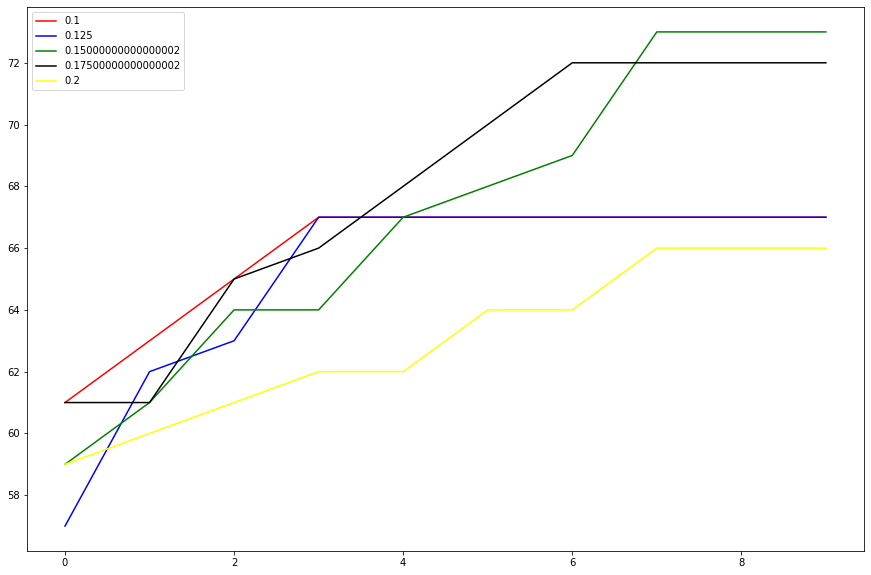

In [319]:
plt.rcParams["figure.figsize"] = (15,10)
color_list = ['red','blue', 'green','black', 'yellow']
no_duplicate = []
l= list(product(threshold_param_list,keep_list))
for i in range(len(mimic_curve)) :
    c = 0
    while l[int(i/len(threshold_param_list))][1] != keep_list[c] :
        c+=1
    color = c/len(population_list)
    if c not in no_duplicate :
        plt.plot(mimic_curve[i],
                 color = color_list[c],
                 label=str(keep_list[c]))
        no_duplicate.append(c)
    else : 
        plt.plot(mimic_curve[i], color = color_list[c])        
    
plt.legend()

In [347]:
## Standart testing for MIMIC
n_iteration = 10
durations = []
score = []
for i in (range(n_iteration)) :
            fn=mlrose.FourPeaks(0.1)
            state=np.random.randint(0,2,size=state_size)
            problem_fit=mlrose.DiscreteOpt(state_size, fn)
            start=time()
            best_state, best_fitness, curve = mlrose.mimic(problem_fit, 
                                                                   keep_pct=0.15,
                                                                   max_attempts = 50, 
                                                                   max_iters=10, curve=True)
            end=time()
            durations.append(end-start)
            score.append(best_fitness)
print("Average score : ", np.mean(score))
print("Average time :  ", np.mean(durations))

Average score :  69.1
Average time :   8.774794006347657


In [348]:
mim_score = score

BoxPlot


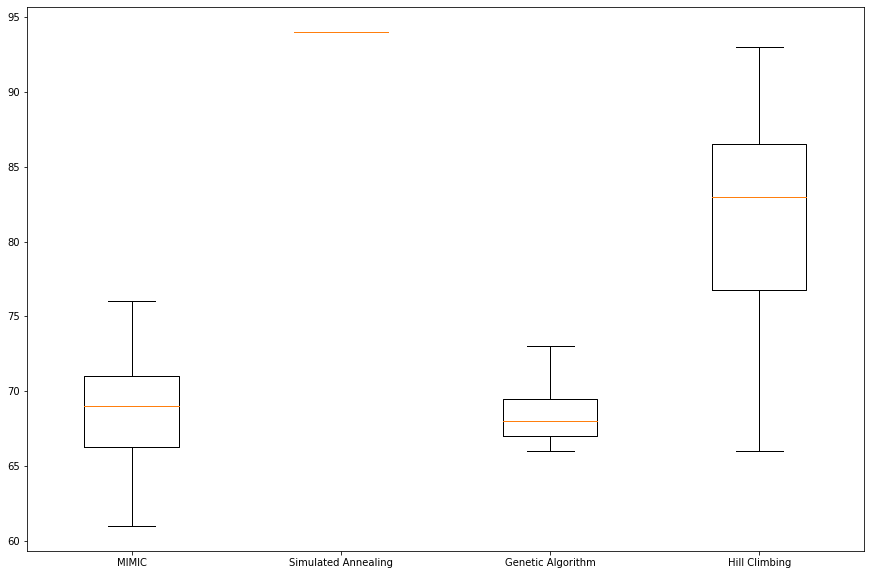

In [392]:
plt.boxplot([mim_score,ann_score, ga_score, hil_score], labels = ["MIMIC","Simulated Annealing", "Genetic Algorithm", "Hill Climbing"])
print("BoxPlot")